In [1]:
#Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

df_c = pd.read_csv('HTHH_PC.csv')
index = df_c.index
columns = df_c.columns
data = df_c.values
df_c.fillna(0, inplace=True)
#df_c.set_index('Sample', inplace=True)
index = df_c.index
columns = df_c.columns
data = df_c.values
df_c.columns.tolist()
df_c.index.tolist()
df_ct = df_c.transpose()
df_ct['Total'] = df_ct.sum(axis=1)
df_ct
df_ct.columns = df_ct.iloc[0]
A = df_ct.drop(df_ct.index[0])

# Overally componentry from point counting

In [2]:
totals = [b+c+d+e+f for b,c,d,e,f in zip(A['sa'], A['sc'], A['se'], A['sf'], A['n'])]
Sa = [i / j * 100 for i,j in zip(A['sa'], totals)]
Sc = [i / j * 100 for i,j in zip(A['sc'], totals)]
Se = [i / j * 100 for i,j in zip(A['se'], totals)]
Sf = [i / j * 100 for i,j in zip(A['sf'], totals)]
none = [i / j * 100 for i,j in zip(A['n'], totals)]

In [3]:
totals = [i+j+k+l+m+n for i,j,k,l,m,n in zip(A['pa'], A['pc'], A['pe'], A['pf'], A['u'],A['c'])]
Pa = [i / j * 100 for i,j in zip(A['pa'], totals)]
Pc = [i / j * 100 for i,j in zip(A['pc'], totals)]
Pe = [i / j * 100 for i,j in zip(A['pe'], totals)]
Pf = [i / j * 100 for i,j in zip(A['pf'], totals)]
unk = [i / j * 100 for i,j in zip(A['u'], totals)]
c = [i / j * 100 for i,j in zip(A['c'], totals)]

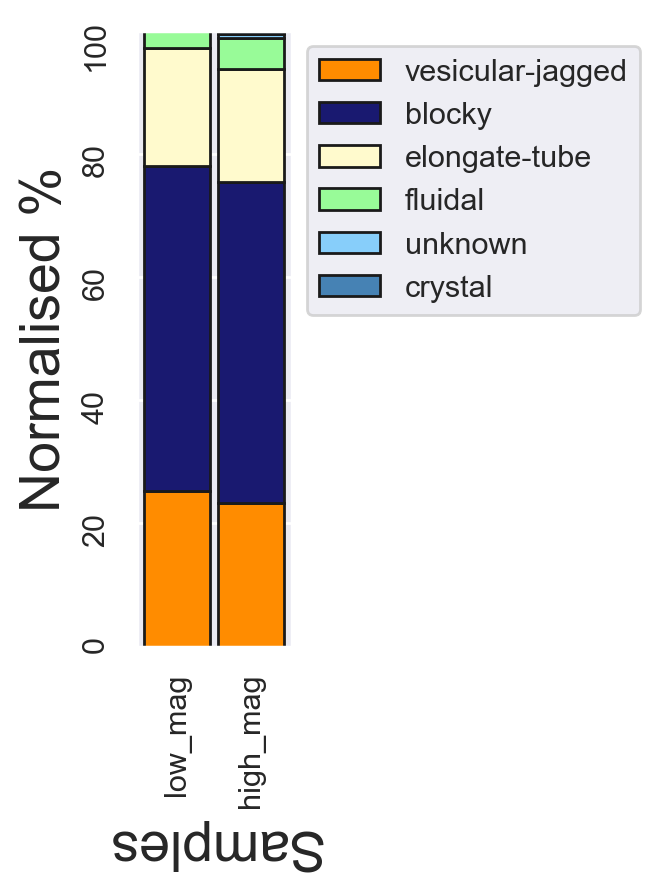

In [4]:
r = A.index
plt.figure(figsize=(1,4), dpi=200)
# plot
barWidth = 0.9
edgecolor = "k"
names = (columns)
# Create green Bars
plt.bar(r, Pa, color='darkorange', label='vesicular-jagged',  edgecolor = edgecolor, width=barWidth)
# Create orange Bars
plt.bar(r,Pc, bottom=Pa, color='midnightblue', label='blocky', edgecolor = edgecolor, width=barWidth)
# Create blue Bars
plt.bar(r, Pe, bottom=[i+j for i,j in zip(Pa, Pc)], color='lemonchiffon', label='elongate-tube', edgecolor = edgecolor,width=barWidth)
#Create blue Bars
plt.bar(r, Pf, bottom=[i+j+k for i,j,k in zip(Pa, Pc, Pe)], color='palegreen', label='fluidal', edgecolor = edgecolor,width=barWidth)
# Create blue Bars
plt.bar(r,unk , bottom=[i+j+k+l for i,j,k,l in zip(Pa, Pc, Pe, Pf)], color='lightskyblue', label='unknown', edgecolor = edgecolor, width=barWidth)
# Create blue Bars
plt.bar(r, c, bottom=[i+j+k+l+m for i,j,k,l,m in zip(Pa,Pc,Pe,Pf, unk)], color='steelblue', label='crystal', edgecolor = edgecolor, width=barWidth)


plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xlabel("Samples",rotation=180, size = 20)
plt.ylabel("Normalised %", size = 20)
#plt.suptitle('0 φ', size=20, y=1.0001)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.savefig("Primary shapes",transparent= True, bbox_inches='tight', dpi=500)
plt.show()

# Break down of componentry

In [5]:
df = pd.read_csv('HTHH_l_pc.csv')
index = df.index
columns = df.columns
data = df.values
df.fillna(0, inplace=True)
#df_c.set_index('Sample', inplace=True)
breakdown = df

fig = px.bar_polar(breakdown, theta="Primary shape",
                   color="Fractures", 
                   template="none",
                   color_discrete_sequence= ["orangered", "midnightblue", "royalblue", "gold", "skyblue"],
                   )

fig.update_polars(angularaxis_linewidth=2)
fig.update_polars(radialaxis_linewidth=1)
fig.update_polars(radialaxis_gridwidth=1)
fig.update_polars(angularaxis_gridcolor="black")

fig.update_layout(
    title='Fracture abundance across Primary shapes',
    font_size=16,
    legend_font_size=16,
    barmode='relative',
    barnorm = 'percent',
    boxmode = "group",

    polar_angularaxis_rotation=90,
    polar=dict(radialaxis=dict(showticklabels=False)))


# Common parameters for all traces
fig.update_traces(marker=dict( opacity=0.9))

fig.show()


In [6]:
import plotly.express as px
fig = px.bar_polar(breakdown,
                   #barmode = "group",
                   theta="Secondary feature",
                   color="Primary shape", 
                   template="none",
                   color_discrete_sequence= ["red", "midnightblue", "royalblue", "gold", "skyblue"])

#fig.update_polars(angularaxis_linewidth=2)
fig.update_polars(radialaxis_linewidth=1)
fig.update_polars(radialaxis_gridwidth=1)
fig.update_polars(angularaxis_gridcolor="black")

fig.update_layout(
    title='Secondary feature abundance across Primary shapes',
    font_size=16,
    legend_font_size=16,
    barmode='relative',
    barnorm = 'percent',
    polar_angularaxis_rotation=90,
    polar=dict(radialaxis=dict(showticklabels=False))),

fig.show()


# Shape parameters
## generated with PARTISAN

In [7]:
bm = pd.read_csv('HTHH.csv')
index = bm.index
columns = bm.columns
data = bm.values
bm.fillna(0, inplace=True)
bm

filename type          p      A         w         b  \
0                 38-10-b.tif   cp   468.6762   8547   88.9694  177.4891   
1    Electron Image 10-09.tif   cp  1005.0408  50465  237.6329  283.1855   
2     Electron Image 10-1.tif   cp   762.9676  25953  149.7586  266.9168   
3    Electron Image 10-11.tif   cp   622.8427  15985  118.5975  187.1298   
4    Electron Image 10-12.tif   cp   432.5168   9102   91.2970  137.9427   
..                        ...  ...        ...    ...       ...       ...   
369  Electron Image 66-05.tif   Fl  1241.4672  46321  170.3851  443.6172   
370  Electron Image 67-04.tif   Fl   465.0437   7526   70.0197  171.7457   
371   Electron Image 7-14.tif   Fl  1036.2956  33953  110.1908  414.2505   
372   Electron Image 8-03.tif   Fl   925.4356  38816  171.0315  333.3994   
373   Electron Image 8-07.tif   Fl  1408.1677  72974  180.3570  582.7203   

            c    a         m  L_b  ...  axial ratio  convexity  solidity  \
0    327.7267  178   48.0506  170  ...      0.53624    0.98513   0.85087   
1    796.3428  273  180.5282  316  ...      0.74367    0.92977   0.92187   
2    571.0823  268   96.9030  266  ...      0.54227    0.89893   0.89078   
3    448.1891  164   86.7872  211  ...      0.56472    0.89769   0.87369   
4    338.1998  137   65.8705  138  ...      0.66680    0.92578   0.91597   
..        ...  ...       ...  ...  ...          ...        ...       ...   
369  762.9462  435  104.4685  444  ...      0.32412    0.85961   0.82218   
370  307.5297  170   43.9593  172  ...      0.38294    0.88097   0.86139   
371  653.1967  405   81.9012  415  ...      0.25444    0.94440   0.88470   
372  698.4098  327  116.5150  334  ...      0.48385    0.91704   0.91532   
373  957.6107  531  125.1647  590  ...      0.31868    0.96442   0.92786   

     Unnamed: 43  circularity  rectangularity  form factor.1  \
0            0.0      0.34499         0.54125        0.48897   
1            0.0      0.62851         0.74992        0.62782   
2            0.0      0.46355         0.64926        0.56025   
3            0.0      0.43248         0.72027        0.51780   
4            0.0      0.55588         0.72274        0.61142   
..           ...          ...             ...            ...   
369          0.0      0.29844         0.61283        0.37767   
370          0.0      0.32460         0.62583        0.43731   
371          0.0      0.24989         0.74382        0.39730   
372          0.0      0.44046         0.68072        0.56955   
373          0.0      0.26367         0.69434        0.46245   

     Feret aspect ratio  Feret aspect ratio.1  regularity parameter  
0               0.50127                1.9949              0.091304  
1               0.83914                1.1917              0.295910  
2               0.56107                1.7823              0.168620  
3               0.63377                1.5779              0.161300  
4               0.66185                1.5109              0.245640  
..                  ...                   ...                   ...  
369             0.38408                2.6036              0.069074  
370             0.40769                2.4528              0.088836  
371             0.26600                3.7594              0.073847  
372             0.51299                1.9493              0.170770  
373             0.30951                3.2309              0.084664  

[374 rows x 50 columns]

In [8]:
bm["Com x Rec_DL"] = bm["Com_DL"] * bm["Rec_DL"]
bm["Elo x Cir_DL"] = bm["Elo_DL"] * bm["Circ_DL"]
#buttner et al., 2002
bm["Com x Elo_DL"] = bm["Com_DL"] * bm["Elo_DL"]
bm["Cir x Rec_DL"] = bm["Circ_DL"] * bm["Rec_DL"]
#Murtagh and White 2013

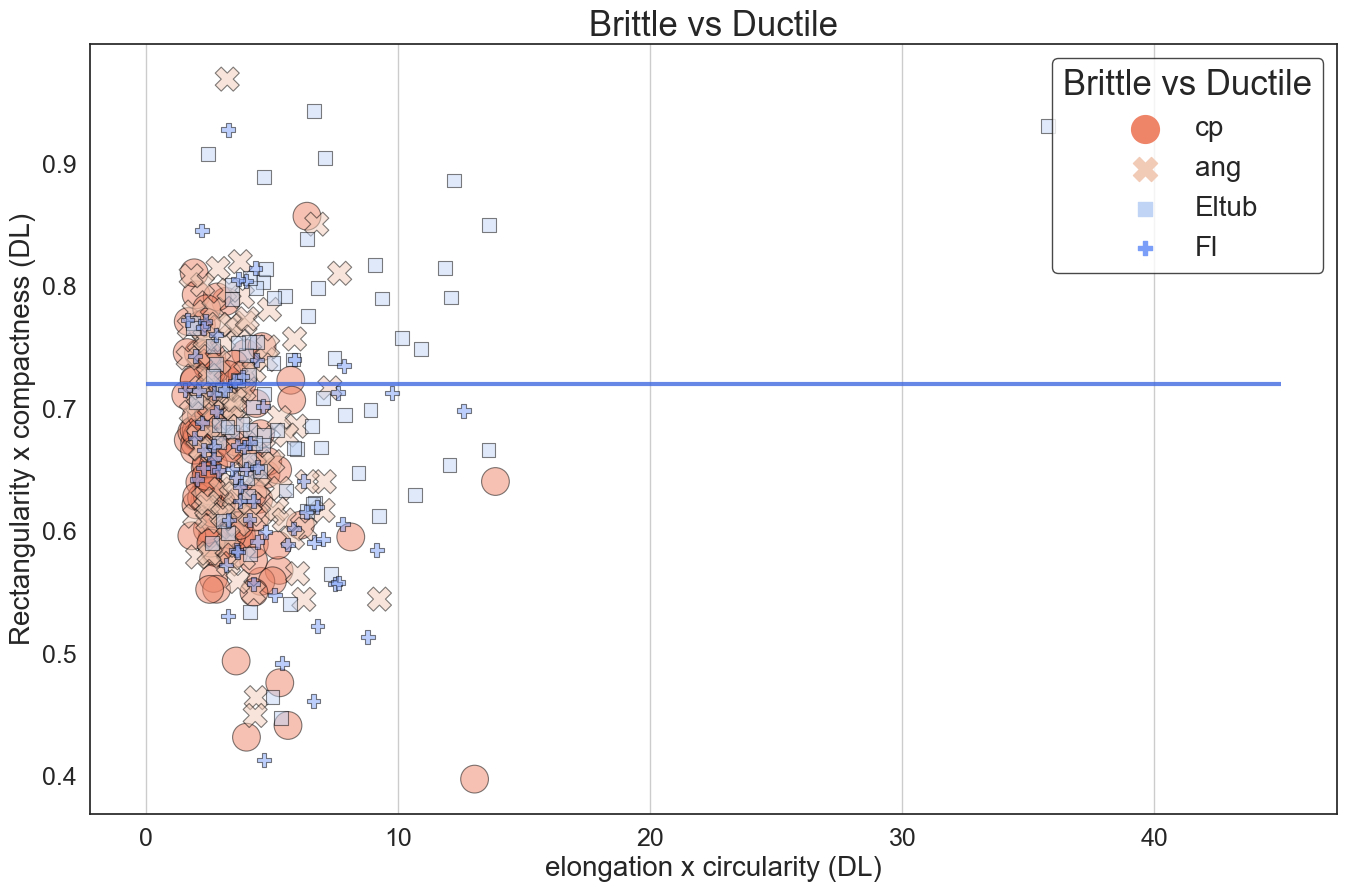

In [9]:
sns.set(rc={'figure.figsize':(16.1,10)})
sns.set_style("white")

ax = sns.scatterplot(y="Com x Rec_DL", 
                     x="Elo x Cir_DL", 
                     data=bm,
                     hue_order=["cp", "ang", "Eltub", "Fl"],
                     hue = "type",
                     size = "type",
                     style = "type",
                     palette = 'coolwarm_r',
                     alpha = 0.5,
                     marker = "o",
                     edgecolor = "black",
                     sizes = (100,400)
                     #s = 150
)

plt.hlines( y = 0.72, color='royalblue', linewidth=3, alpha=.8, xmin = 0, xmax = 45) 

ax.axes.set_title("Brittle vs Ductile",fontsize=25)

ax.set_xlabel("elongation x circularity (DL)",fontsize=20)
ax.set_ylabel("Rectangularity x compactness (DL)",fontsize=20)
ax.tick_params(labelsize=18)
ax.grid(axis = 'x')

#legend and annotation
ax.legend(title = "Brittle vs Ductile", title_fontsize = 25, fontsize = 20, edgecolor = 'k', ncol=1)

#plt.savefig("Magma flux by block", bbox_inches='tight', facecolor = "white", dpi=500)
plt.show()

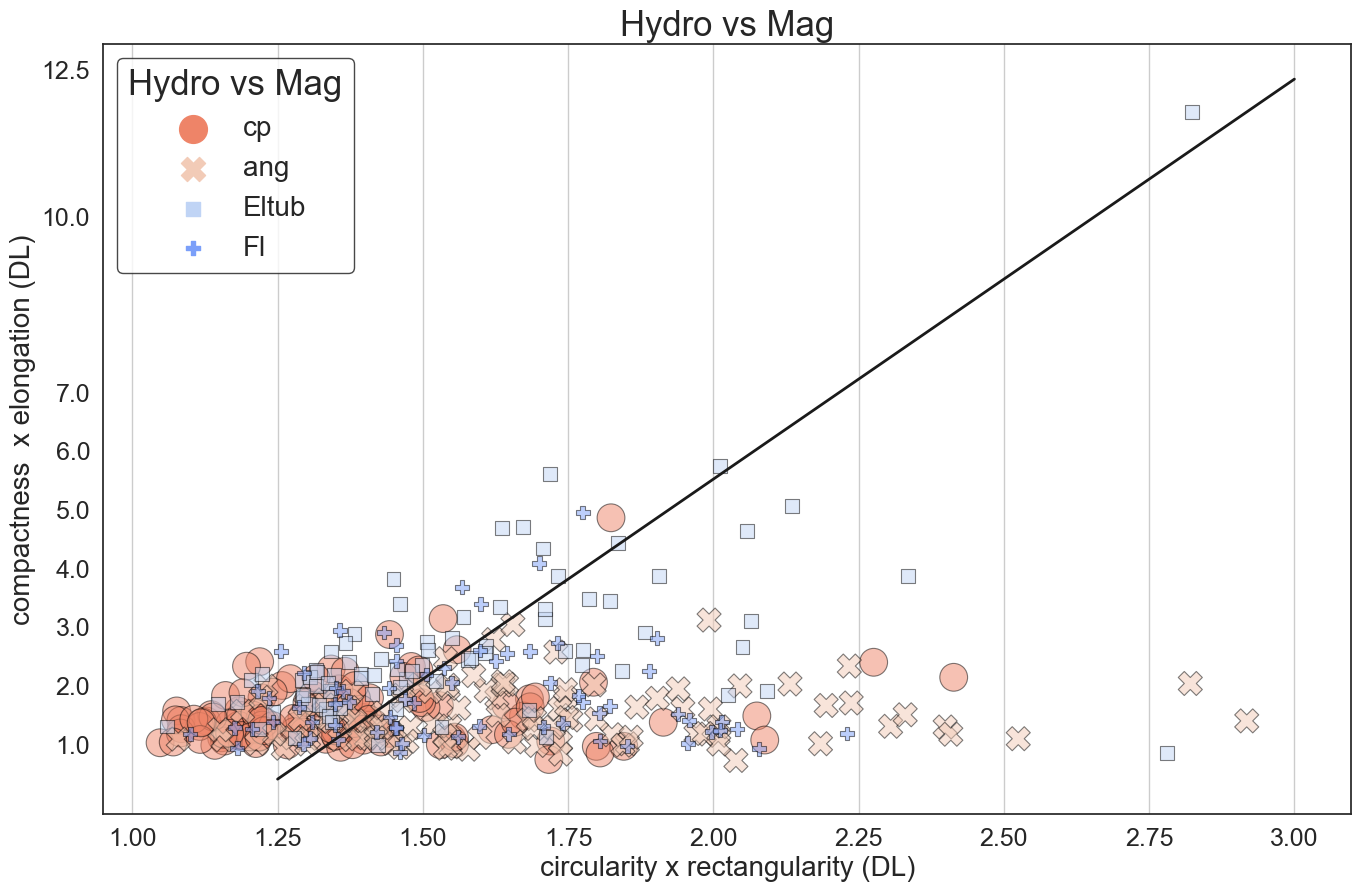

In [10]:
sns.set(rc={'figure.figsize':(16.1,10)})
sns.set_style("white")

b = sns.scatterplot(x="Cir x Rec_DL", 
                     y="Com x Elo_DL", 
                     data=bm,
                     hue_order=["cp", "ang", "Eltub", "Fl"],
                     hue = "type",
                     size = "type",
                     style = "type",
                     palette = 'coolwarm_r',
                     alpha = 0.5,
                     marker = "o",
                     edgecolor = "black",
                     sizes = (100,400)
                     #s = 150
)
b.axes.set_title("Hydro vs Mag",fontsize=25)
#plt.hlines(  y = 0.00001, color='red', linewidth=10, xmin = 7.47, xmax = 8.63) 
b.set_xlabel("circularity x rectangularity (DL)",fontsize=20)
b.set_ylabel("compactness  x elongation (DL)",fontsize=20)
b.tick_params(labelsize=18)
b.set(yticks=[1,2,3,4,5,6,7,10,12.5])
b.grid(axis = 'x')

#legend and annotation
b.legend(title = "Hydro vs Mag", title_fontsize = 25, fontsize = 20, edgecolor = 'k', ncol=1)
#plt.axvline(0)
#plt.colorbar(sm)

#creating line from Schipper 2009
x = np.linspace(1.25,3,100)
y = 6.8182*x-8.1136
b.plot(x, y, '-k', linewidth=2.0)
plt.show()

#plt.savefig("Magma flux by block", bbox_inches='tight', facecolor = "white", dpi=500)
plt.show()

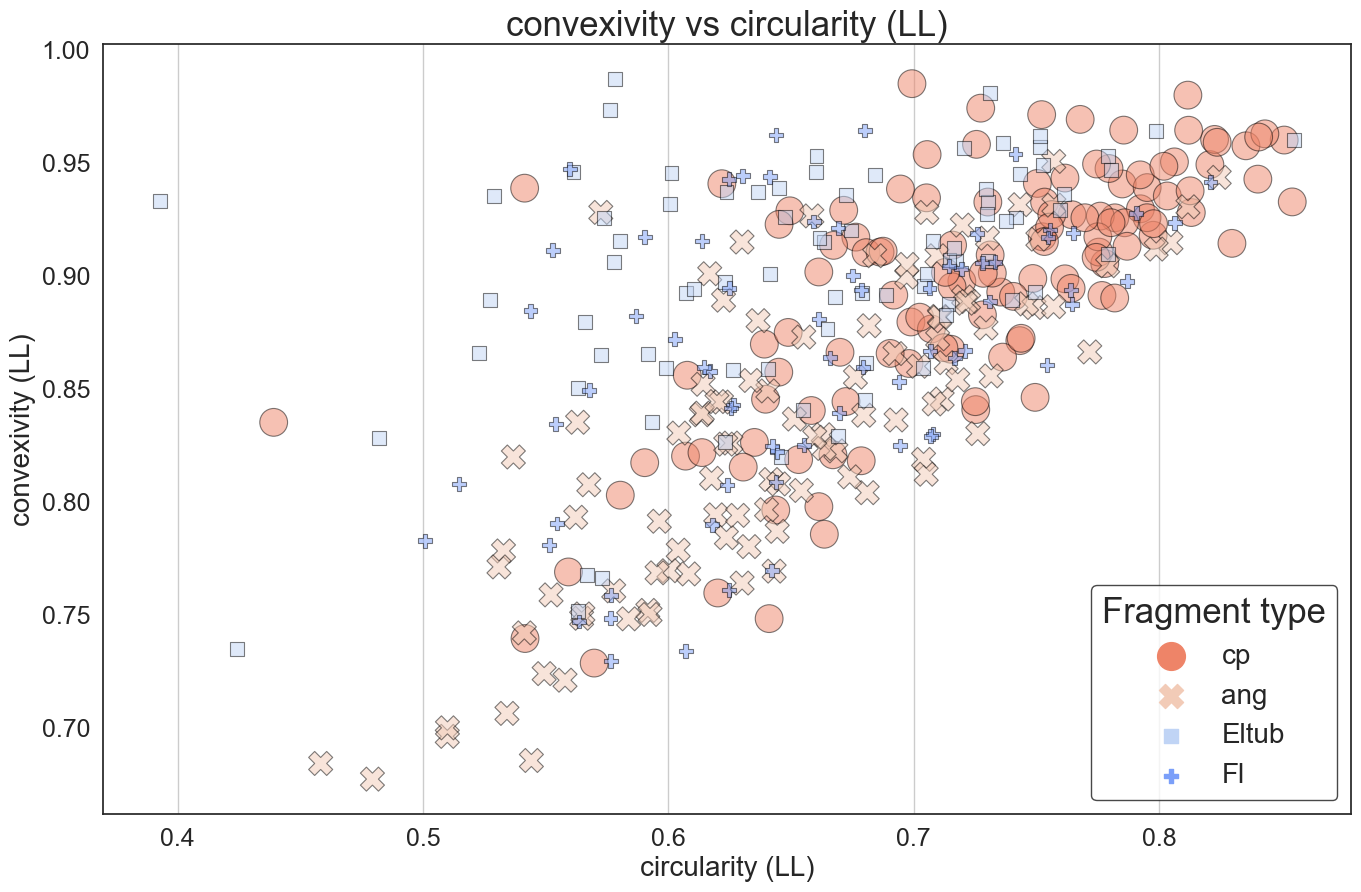

In [11]:
sns.set(rc={'figure.figsize':(16.1,10)})
sns.set_style("white")

b = sns.scatterplot(x="Circ_LL", 
                     y="Con_LL", 
                     data=bm,
                     hue_order=["cp", "ang", "Eltub", "Fl"],
                     hue = "type",
                     size = "type",
                     style = "type",
                     palette = 'coolwarm_r',
                     alpha = 0.5,
                     marker = "o",
                     edgecolor = "black",
                     sizes = (100,400)
                     #s = 150
)


b.axes.set_title("convexivity vs circularity (LL)",fontsize=25)
#plt.hlines(  y = 0.00001, color='red', linewidth=10, xmin = 7.47, xmax = 8.63) 
b.set_xlabel("circularity (LL)",fontsize=20)
b.set_ylabel("convexivity (LL)",fontsize=20)
b.tick_params(labelsize=18)
#b.set(yticks=[1,2,3,4,5,6,7,10,12.5])
b.grid(axis = 'x')

#legend and annotation
b.legend(title = "Fragment type", title_fontsize = 25, fontsize = 20, edgecolor = 'k', ncol=1)
#plt.axvline(0)
#plt.colorbar(sm)



#plt.savefig("Magma flux by block", bbox_inches='tight', facecolor = "white", dpi=500)

plt.show()

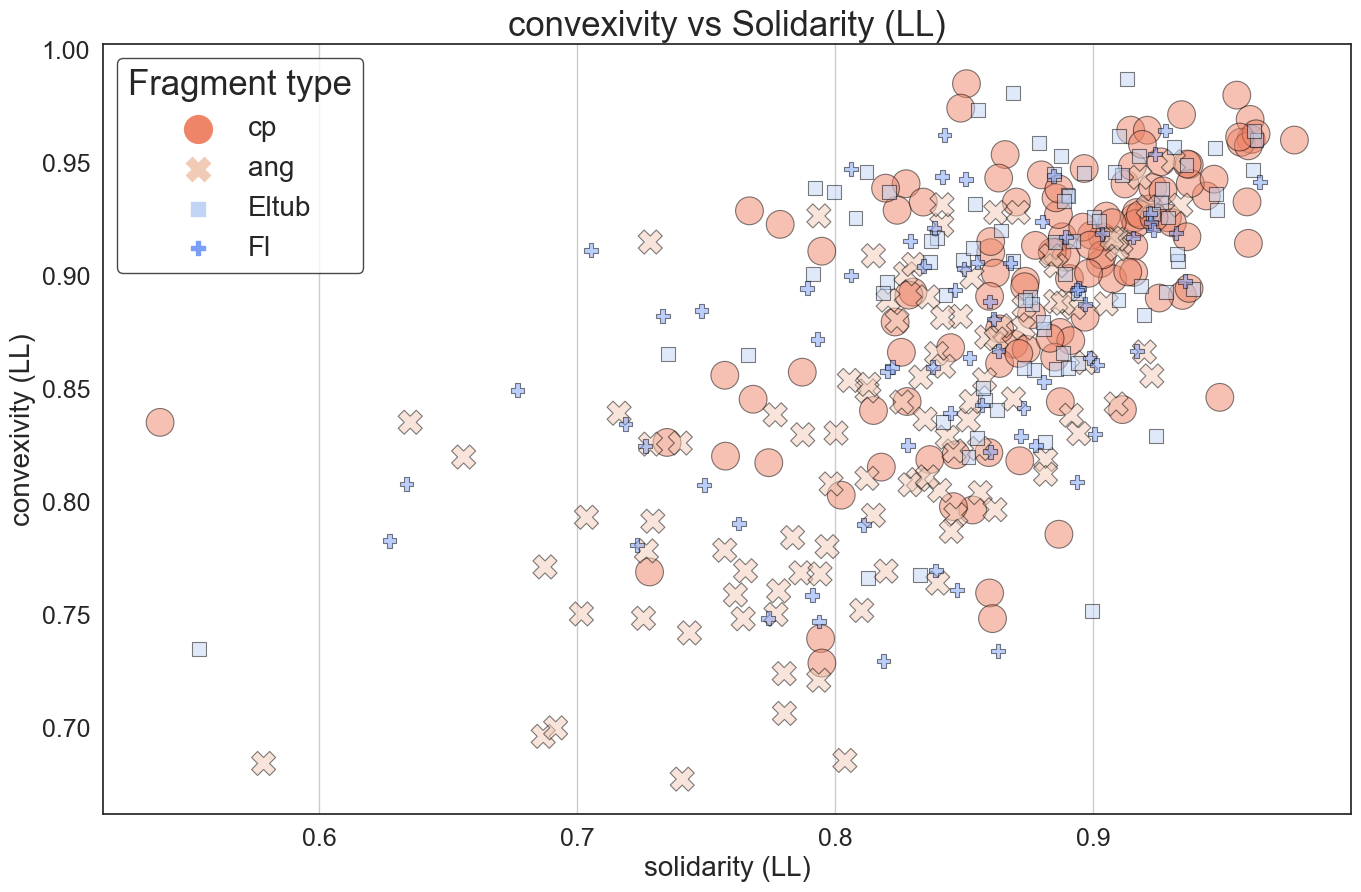

In [12]:
sns.set(rc={'figure.figsize':(16.1,10)})
sns.set_style("white")

b = sns.scatterplot(x="Sol_LL", 
                     y="Con_LL", 
                     data=bm,
                     hue_order=["cp", "ang", "Eltub", "Fl"],
                     hue = "type",
                     size = "type",
                     style = "type",
                     palette = 'coolwarm_r',
                     alpha = 0.5,
                     marker = "o",
                     edgecolor = "black",
                     sizes = (100,400)
                     #s = 150
)


b.axes.set_title("convexivity vs Solidarity (LL)",fontsize=25)
#plt.hlines(  y = 0.00001, color='red', linewidth=10, xmin = 7.47, xmax = 8.63) 
b.set_xlabel("solidarity (LL)",fontsize=20)
b.set_ylabel("convexivity (LL)",fontsize=20)
b.tick_params(labelsize=18)
#b.set(yticks=[1,2,3,4,5,6,7,10,12.5])
b.grid(axis = 'x')

#legend and annotation
b.legend(title = "Fragment type", title_fontsize = 25, fontsize = 20, edgecolor = 'k', ncol=1)
#plt.axvline(0)
#plt.colorbar(sm)



#plt.savefig("Magma flux by block", bbox_inches='tight', facecolor = "white", dpi=500)

plt.show()

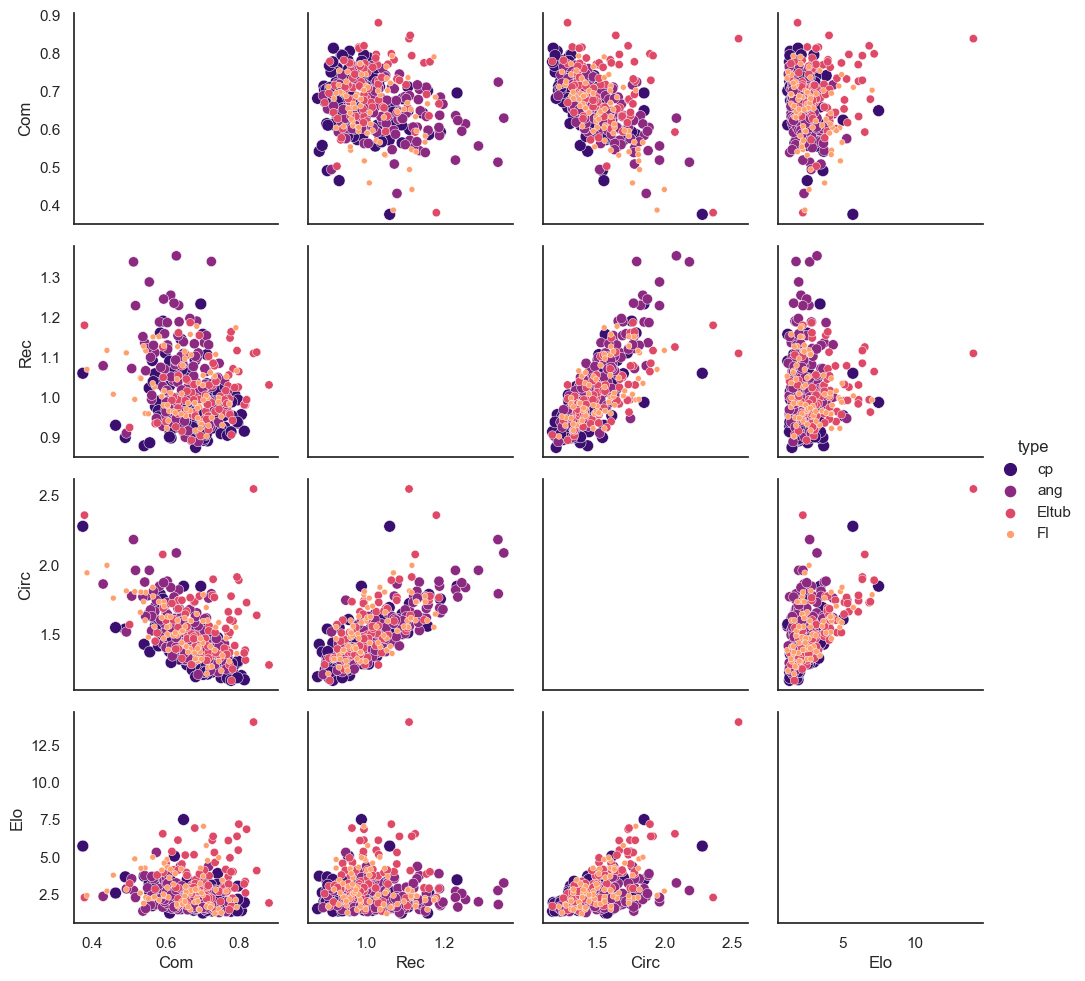

In [13]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set_style("white")
#Dellino and La Volpe 1996

Com_DL = np.array(bm["Com_DL"], dtype=float)
Rec_DL = np.array(bm["Rec_DL"], dtype=float)
Circ_DL = np.array(bm["Circ_DL"], dtype=float)
Elo_DL = np.array(bm["Elo_DL"], dtype=float)
ty = bm["type"]

DL = pd.DataFrame({"type":ty,'Com': Com_DL, 'Rec': Rec_DL, 'Circ': Circ_DL, "Elo": Elo_DL})
DL

g = sns.PairGrid(DL, hue = "type", palette = "magma")
g.map_offdiag(sns.scatterplot, size=DL["type"])
g.add_legend()
plt.show()